# A super-brief intro to Python and Numpy

Python is:
* interpreted (high level)
* readable
* concise
* cross-platform
* dynamically-typed
* object oriented
* automatically memory-managed

Almost all of the below is explained much more fully at various places online. Try:
http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/tree/master/
...for a nice entry level tutorial set, or the Software Carpentry intros:
http://software-carpentry.org/v4/python/

The main Python documentation is also an extremely readable source of knowledge. Just Google!

##PROGRAM FILES AND INTERACTIVE ENVIRONMENTS
Put Python code in .py text files (AKA "scripts").
Run these from a shell, as:

> python myscript.py

OR

Use one of Python's interactive environments (e.g., iPython)!

> ipython

In an interactive environment:

* Run code line-by-line, preserving variables
* Run your scripts, using the magic command "%run" (& preserve the variables)

This iPython notebook is an interactive environment.

##MODULES
Python has some built-in functions, but everything else comes in a library module.

* See the built in functions here: https://docs.python.org/2/library/functions.html

Modules are *imported*, then the functions they hold run with a *dot* syntax:

In [3]:
import math  # comments with a hash
x = math.cos(2. * math.pi)
print x   # print is a built-in function

1.0


OR import the functions and properties individually:

In [4]:
from numpy import cos, pi #numpy, numeric python, also has these functions
x = cos(2. * pi)
print x

1.0


Get help in an interactive shell with a trailing "?", quit it with "q"

In [5]:
pi?

##TYPES
Python distinguishes:
* integer (int)
* float (float)
* boolean (bool)
* complex (complex)
* strings (str)

You may also encounter numpy types, like "numpy.float64"

In [6]:
type(pi)

float

Typecasting is automatic where possible, but can be time-expensive.

Python's inbuilt *data structures* are:
* tuples, with *parentheses* - immutable
* lists, with *square brackets* - mutable
* sets, as set() - unordered collection with no duplicates
* dictionaries, with *curly brackets* - associated pairs of key:value

Note that all these data structures let you happily mix data types... But the cost is that Python runs slower than, e.g., C++.

In [7]:
mytuple = (0,1,2,3)
print 'You can index: ', mytuple[1]
print '...but not reassign...'
mytuple[0] = 100

You can index:  1
...but not reassign...


TypeError: 'tuple' object does not support item assignment

In [8]:
mylist = [0,1,2,3]
print 'This time reassignment works: '
mylist[0] = 'I can store a string!'
print mylist

This time reassignment works: 
['I can store a string!', 1, 2, 3]


In [9]:
myset = set([0,1,2,3])
print myset
myset.add("string!") #you can use both ' and " to declare a string
print 'Adding is easy: ', myset
myset.add(0)
print "But remember, duplicates don't count! ", myset

set([0, 1, 2, 3])
Adding is easy:  set([0, 1, 2, 3, 'string!'])
But remember, duplicates don't count!  set([0, 1, 2, 3, 'string!'])


In [10]:
mydict = {'firstkey':1, 'secondkey':2, 3:'three'}
print mydict
print mydict['firstkey']
print mydict['secondkey']
print mydict[3]
print 'Get the keys (note lack of ordering): ', mydict.keys()
print 'Get the values: ', mydict.values()
print 'This will fail: ', mydict[2]

{'secondkey': 2, 3: 'three', 'firstkey': 1}
1
2
three
Get the keys (note lack of ordering):  ['secondkey', 3, 'firstkey']
Get the values:  [2, 'three', 1]
This will fail: 

KeyError: 2

## INDEXING
* Indexing starts from 0
* Index with square brackets [start (: stop(: step))]
* "stop" is *exclusive* of the named index
* Colon alone means "all of these" or "to the start/end"

In [11]:
x = range(10)
print 'x[3] gives ', x[3]
print 'x[1,5,2] gives ', x[1:5:2]
print 'x[8:] gives ', x[8:]
print 'x[:7] gives ', x[:7]
print 'x[::3] gives ', x[::3]

 x[3] gives  3
x[1,5,2] gives  [1, 3]
x[8:] gives  [8, 9]
x[:7] gives  [0, 1, 2, 3, 4, 5, 6]
x[::3] gives  [0, 3, 6, 9]


## PYTHON IS LIKE, BUT ISN'T, MATLAB
- This is a *power*:

In [12]:
x = 10.**2  #...or...
import numpy as np
x = np.square(10.)  # NEVER 10.^2.

Likewise, it's also useful to know about the "truncation" (//) and "remainder" (%) division operators:

In [31]:
print 'truncate: ', 13//4
print 'remainder: ', 13%4

truncate:  3
remainder:  1


- End indices are NOT inclusive

In [32]:
len(range(0,100)) #in Matlab this would be 101

100

In [33]:
[x for x in xrange(5)]

[0, 1, 2, 3, 4]

- Intelligent memory management means Python will pass objects *by reference* where possible:

In [34]:
x = [0] * 3
y = [1,2,3]
print 'x starts as ', x
print 'y starts as ', y
x = y
print 'After setting equal, x is ', x
y[1] = 100
print 'After modifying y, x is ', x
#force a copy with [:]
x = y[:]
y[1] = 1000000
print 'After forcing a copy, x is still ', x, ' but y is now ', y

x starts as  [0, 0, 0]
y starts as  [1, 2, 3]
After setting equal, x is  [1, 2, 3]
After modifying y, x is  [1, 100, 3]
After forcing a copy, x is still  [1, 100, 3]  but y is now  [1, 1000000, 3]


- As long as you assign to a variable, Python doesn't output by default, so lines don't have to terminate in ";"

In [35]:
x = range(10) #...see?

- Python doesn't use brackets to delineate code blocks. It uses *indentation* with a fixed number of spaces (normally 4). This also applies to for loops, while loops, if statements, try/except statements, class declarations, function declarations, etc etc.

In [36]:
def myfunction(arg1, arg2, **kwds):
    # **kwds is a special (optional) dictionary input type,
    # that you can use as an input "wildcard"
    try:
        print_this = kwds['printy']
    except KeyError:
        x = arg1 * arg2
        return x  #...no brackets needed; both lines have 4 space indents
    else:
        print print_this

print 'first time ', myfunction(3.,4.)
print 'second time... '
myfunction(5,6,printy='Printed this time!')

first time  12.0
second time... 
Printed this time!


- Python's plotting is a blatant clone of matlab's, and lives in the library matplotlib.pyplot:

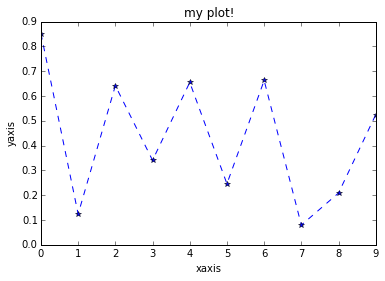

In [38]:
%matplotlib inline
#that command tells this notebook to put plots into the notebook
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(10.) #like range()
y = np.random.rand(10.) #ten random floats, 0->1
plt.plot(x,y, '*--')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.title('my plot!')

## NUMPY and LANDLAB